In [1]:
import numpy as np
import h5py

import matplotlib.pyplot as plt
import matplotlib as mpl

from lib.data import normalize_single_images

# Here we set some varibles to let all plots look similar

In [2]:
phase_ticks = np.arange(-180, 181, 45)
freq_limit_low = 5.1
freq_limit_high = 7.8

In [3]:
 face_colors = {
    'orange': [0.8906, 0.4609, 0.4062],
    'gray': [0.6523, 0.6484, 0.6484],
    'blue': [0.5156, 0.5977, 0.8789]
}
edge_colors = {
    'orange': [0.9961, 0, 0],
    'gray': [0.4805, 0.4766, 0.4766],
    'blue': [0, 0, 0.9961]
}

edge_colors_arr = [ec for ec in edge_colors.values()]
face_colors_arr = [fc for fc in face_colors.values()]

cycler = (plt.cycler(mec=edge_colors_arr)+
          plt.cycler(mfc=face_colors_arr)+
          plt.cycler(color=edge_colors_arr))

In [4]:
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 16,
    'lines.markeredgewidth': 2,
    'lines.markersize': 9,
    'lines.marker': 'o',
    'lines.linestyle': '',
    'lines.linewidth': 3,
    'axes.prop_cycle': cycler
    })

# Theory phase diagram

In [5]:
# first we load the theory data
with h5py.File('data/phase_diagram_theory.h5', 'r') as theory_file:
    theory_chern_numbers = theory_file['chern_number'][:] # note that we use [:] to copy the data into memory
    theory_freqs = theory_file['freq'][:]
    theory_phase = theory_file['phase'][:]

In [6]:
# for plotting we transpose the chern numbers to have the phase as x axis.
theory_chern_numbers = theory_chern_numbers.T

# make axis grid
[freq_axis, phase_axis] = np.meshgrid(theory_phase, theory_freqs)

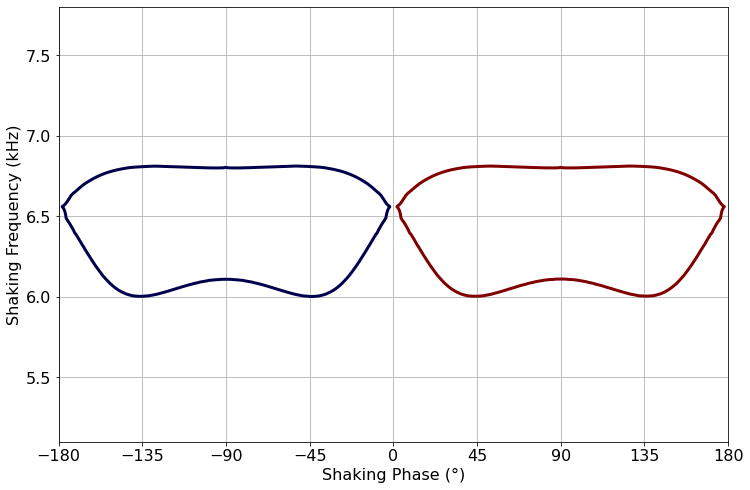

In [7]:
plt.contour(freq_axis, phase_axis, theory_chern_numbers, levels=(-0.5, 0.5), cmap='seismic')
plt.grid()
plt.xticks(phase_ticks)
plt.xlim(-180, 180)
plt.ylim(freq_limit_low, freq_limit_high)
plt.xlabel('Shaking Phase (°)')
plt.ylabel('Shaking Frequency (kHz)')
plt.savefig('plots/IIa/theory_phase_diagram.eps')
plt.show()

# Experimental protocol
This is only a visualization of the protocol. Thus the variables are not extracted from the dataset

In [8]:
time_ticks = [0, 10, 20, 25, 27, 32, 32, 40]
time_ticks_label = [5, 15, 22.5, 26, 29.5, 36]
lattice_ramp = np.array([0, 0, 1, 1, 1, 1, 0, 0])*7.4
amplitude_ramp = [0, 0, 0, 1, 1, 1, 0, 0]
freq_ramp = [4.5, 4.5, 6.2, 6.2]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


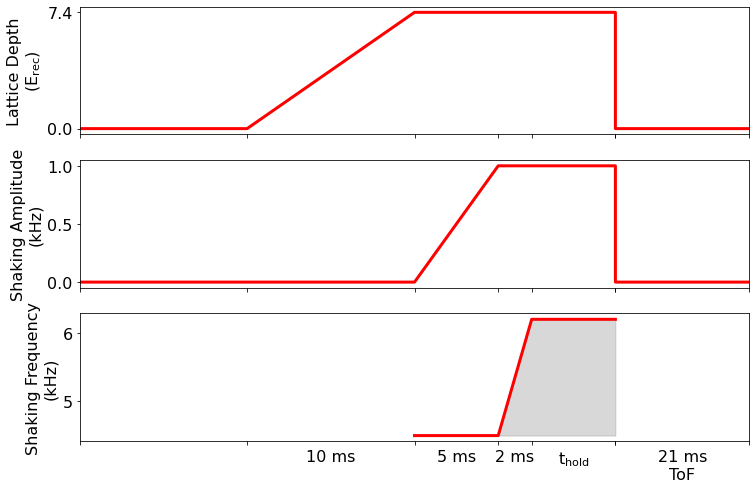

In [9]:
fig = plt.figure()
ax1, ax2, ax3 = fig.subplots(3, 1, sharex=True)

ax1.plot(time_ticks, lattice_ramp, '-')
ax1.set_ylabel('Lattice Depth\n(E$_\mathrm{rec}$)')
ax1.set_yticks([0, 7.4])

ax2.plot(time_ticks, amplitude_ramp, '-')
ax2.set_ylabel('Shaking Amplitude\n(kHz)')

ax3.plot(time_ticks[2:-2], freq_ramp, '-')
ax3.fill_between(time_ticks[2:-2], freq_ramp, freq_ramp[0], color='gray', alpha=0.3)
ax3.set_xticklabels('')
ax3.set_xticks(time_ticks_label, minor=True)
ax3.set_xticklabels(['', '10 ms', '5 ms', '2 ms', 't$_\mathrm{hold}$', '21 ms\nToF'],
                    minor=True)
ax3.set_ylabel('Shaking Frequency\n(kHz)')

ax1.tick_params(length=0, which='minor')
ax2.tick_params(length=0, which='minor')
ax3.tick_params(length=0, which='minor', pad=8)

plt.xticks(time_ticks)
plt.xlim(np.min(time_ticks), np.max(time_ticks))

plt.savefig('plots/IIa/experimental_protocol.eps', bbox_inches='tight')
plt.show()

# Plot sample images

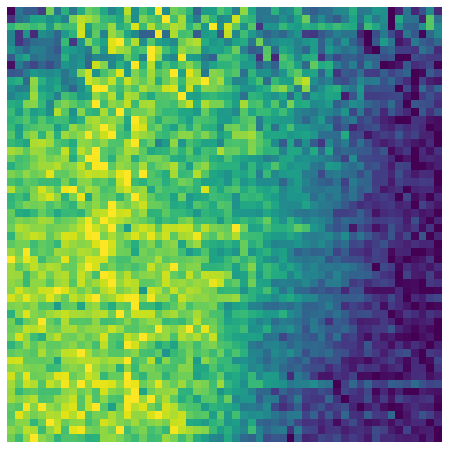

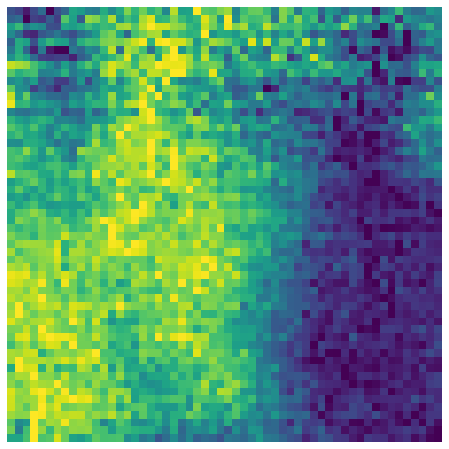

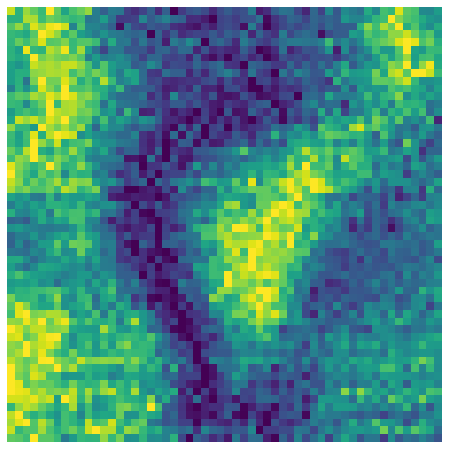

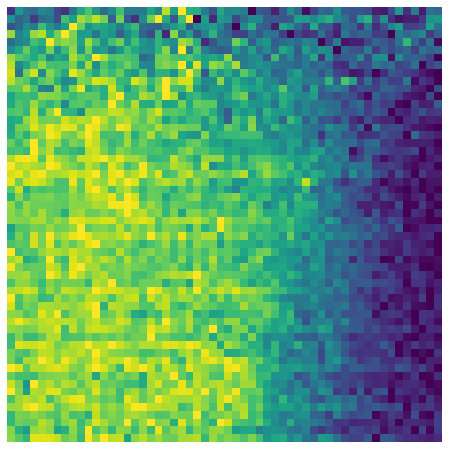

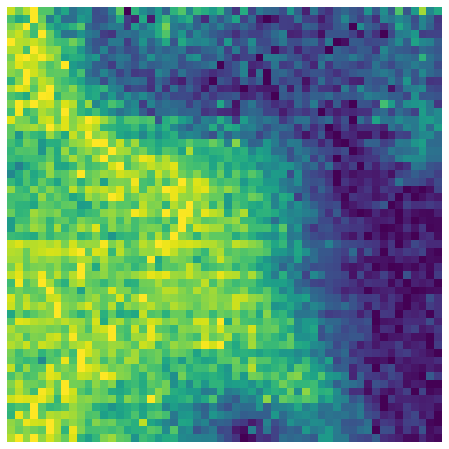

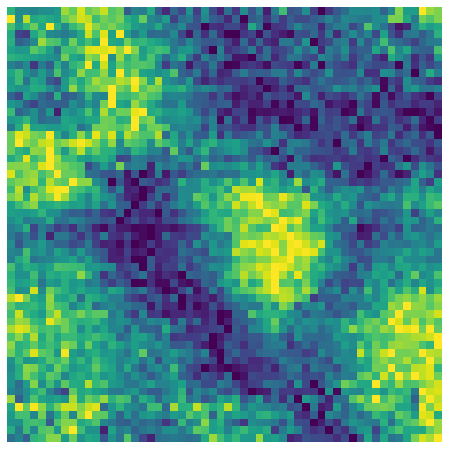

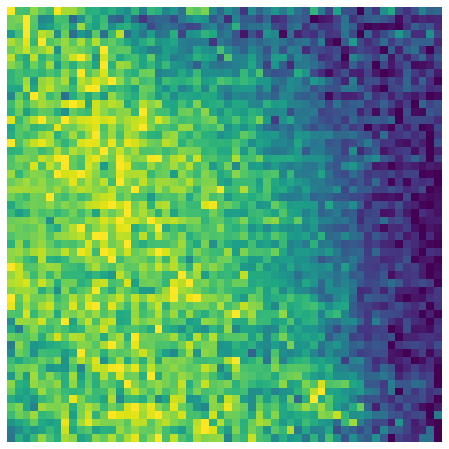

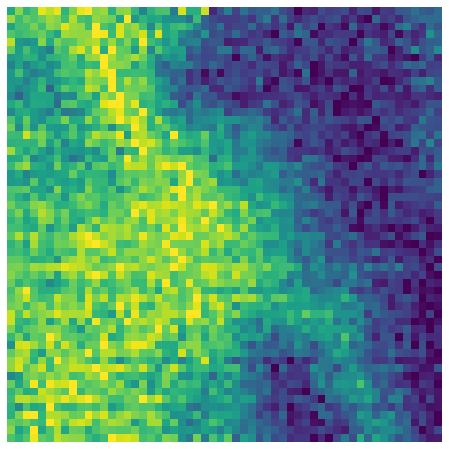

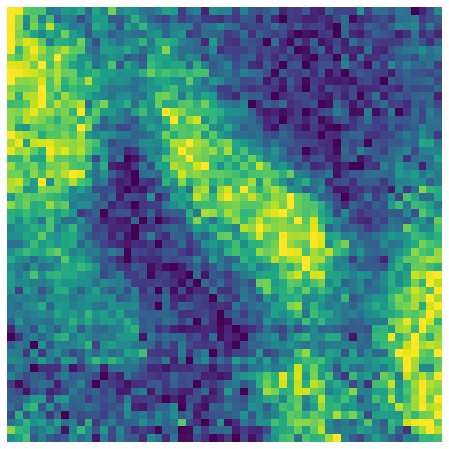

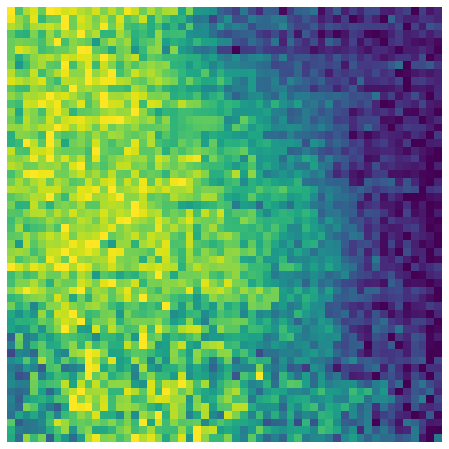

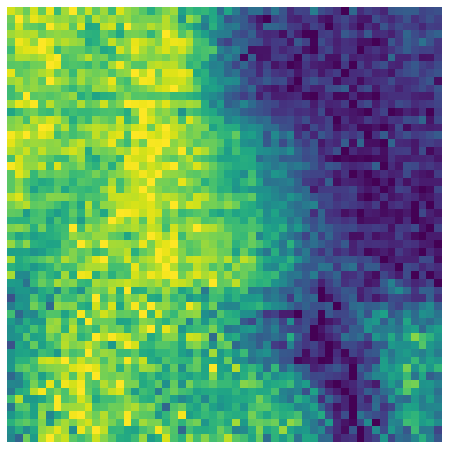

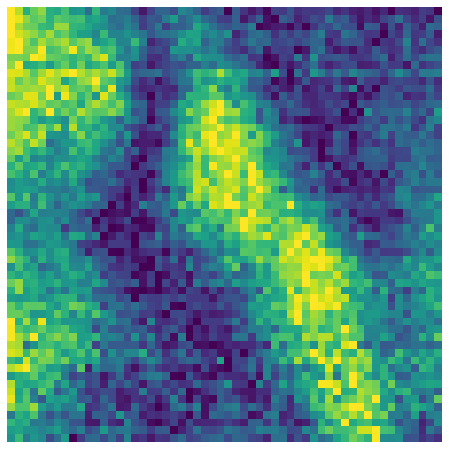

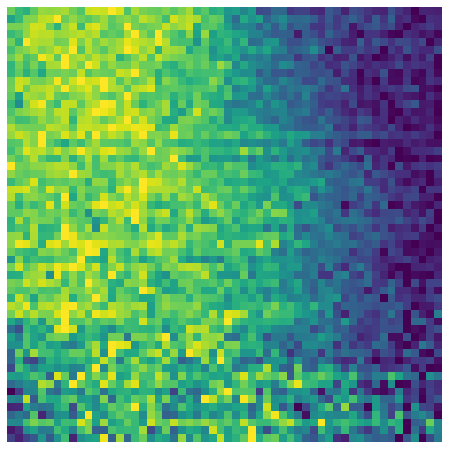

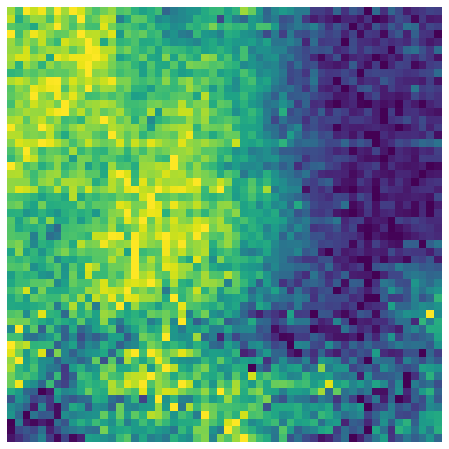

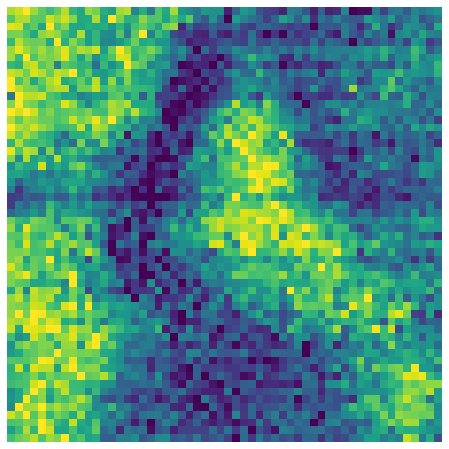

In [10]:
selection_freqs = [5.5, 6.5, 7.3]
selection_phases = [-90, -45, 0, 45, 90]

with h5py.File('data/phase_diagram_56.h5', 'r') as exp_file:
    images = exp_file['images']
    exp_freqs = exp_file['parameter/freq'][:]
    exp_phase = exp_file['parameter/phase'][:]
    
    for phase in selection_phases:
        for freq in selection_freqs:
            selection_map = np.logical_and(exp_freqs == freq, exp_phase == phase)
            image_index = np.where(selection_map)[0][0]
            
            # plot the sample
            plt.imshow(np.squeeze(normalize_single_images(images[image_index])))
            plt.axis('off')
            plt.savefig('plots/IIa/sample_tof_image_freq_{}_phase_{}.eps'.format(freq, phase), bbox_inches='tight')
            plt.show()

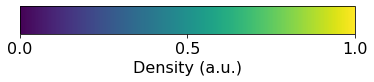

In [11]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=[0, 0.5, 1])
cb1.set_label('Density (a.u.)')
plt.savefig('plots/IIa/colorbar_horizontal.eps', bbox_inches='tight')
plt.show()

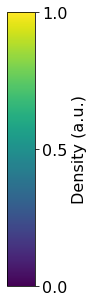

In [12]:

fig, ax = plt.subplots(figsize=(0.5, 10))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical',
                                ticks=[0, 0.5, 1])
cb1.set_label('Density (a.u.)')
plt.savefig('plots/IIa/colorbar_vertical.eps', bbox_inches='tight')
plt.show()